In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "basilicata"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,32.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2020-11-11T17:00:00,17,Basilicata,133,19,152,2996,3148,161,168,...,3.0,1456.0,1466.0,165.0,12.50,4.83,11.54,11.46,5.56,5.624
261,2020-11-12T17:00:00,17,Basilicata,134,19,153,3187,3340,192,202,...,3.0,1615.0,1623.0,191.0,12.42,4.58,12.51,12.45,0.00,6.417
262,2020-11-13T17:00:00,17,Basilicata,141,23,164,3436,3600,260,307,...,1.0,2269.0,2256.0,249.0,14.02,4.56,13.53,13.61,21.05,9.192
263,2020-11-14T17:00:00,17,Basilicata,144,21,165,3668,3833,233,265,...,5.0,2250.0,2255.0,232.0,12.73,4.30,11.78,11.75,-8.70,7.361


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 158
Nuovi tamponi: 1532.0
Percentuale nuovi positivi/nuovi tamponi: 10.299999999999999 %
Nuovi guariti: 21.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: 11.0
Variazione positivi in terapia intensiva: 5.0
Variazione positivi in isolamento dimiciliare: 120.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-16T17:00:00,17,Basilicata,6,1,7,157,164,3,5,...,0.0,533.0,533.0,3.0,14.29,4.27,0.94,0.94,0.00,3.106
1,2020-09-17T17:00:00,17,Basilicata,6,1,7,159,166,2,5,...,0.0,583.0,583.0,2.0,14.29,4.22,0.86,0.86,0.00,3.049
2,2020-09-18T17:00:00,17,Basilicata,6,1,7,156,163,-3,0,...,0.0,438.0,438.0,-3.0,14.29,4.29,0.00,0.00,0.00,0.000
3,2020-09-19T17:00:00,17,Basilicata,6,1,7,158,165,2,3,...,0.0,634.0,634.0,2.0,14.29,4.24,0.47,0.47,0.00,1.840
4,2020-09-20T17:00:00,17,Basilicata,6,1,7,159,166,1,6,...,0.0,327.0,327.0,1.0,14.29,4.22,1.83,1.83,0.00,3.636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-11T17:00:00,17,Basilicata,133,19,152,2996,3148,161,168,...,3.0,1456.0,1466.0,165.0,12.50,4.83,11.54,11.46,5.56,5.624
57,2020-11-12T17:00:00,17,Basilicata,134,19,153,3187,3340,192,202,...,3.0,1615.0,1623.0,191.0,12.42,4.58,12.51,12.45,0.00,6.417
58,2020-11-13T17:00:00,17,Basilicata,141,23,164,3436,3600,260,307,...,1.0,2269.0,2256.0,249.0,14.02,4.56,13.53,13.61,21.05,9.192
59,2020-11-14T17:00:00,17,Basilicata,144,21,165,3668,3833,233,265,...,5.0,2250.0,2255.0,232.0,12.73,4.30,11.78,11.75,-8.70,7.361


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

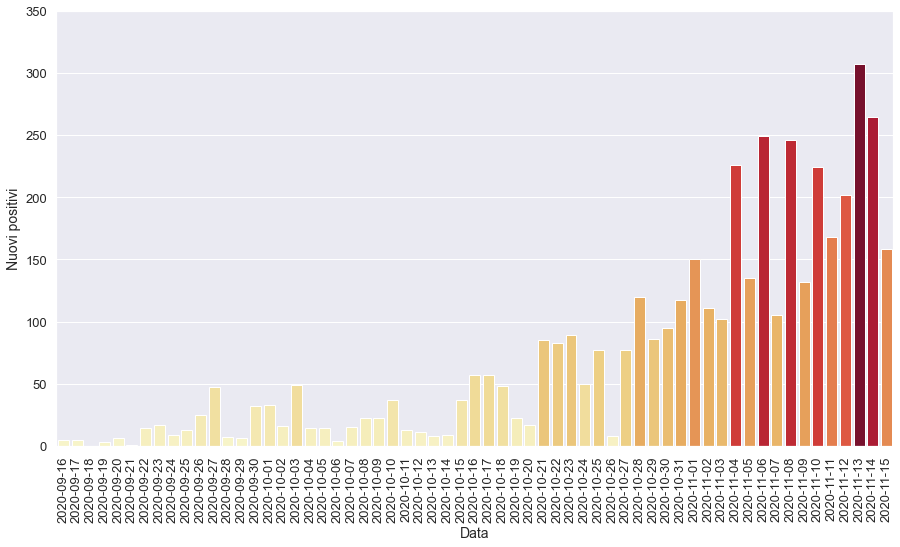

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

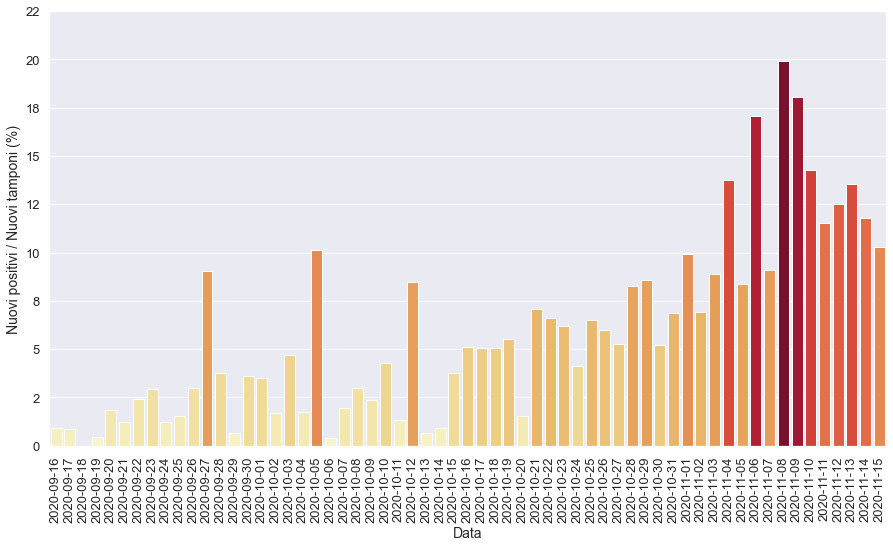

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

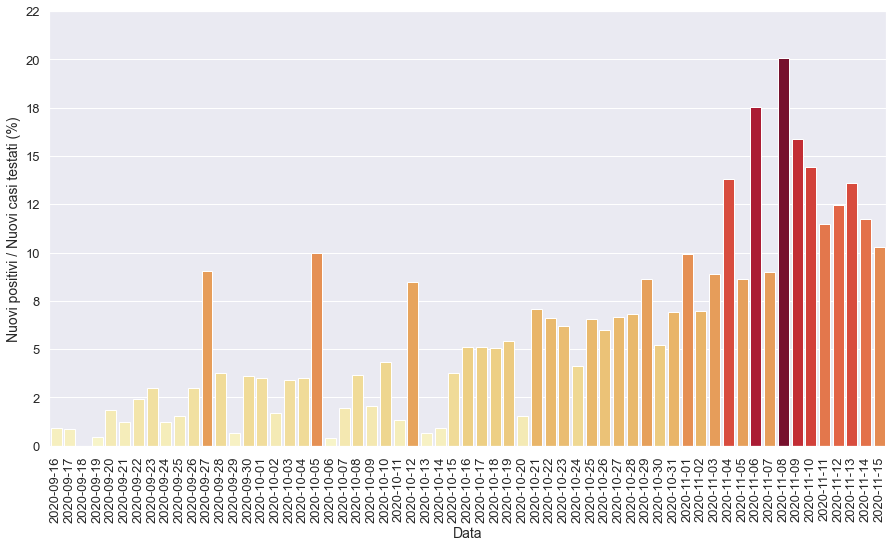

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

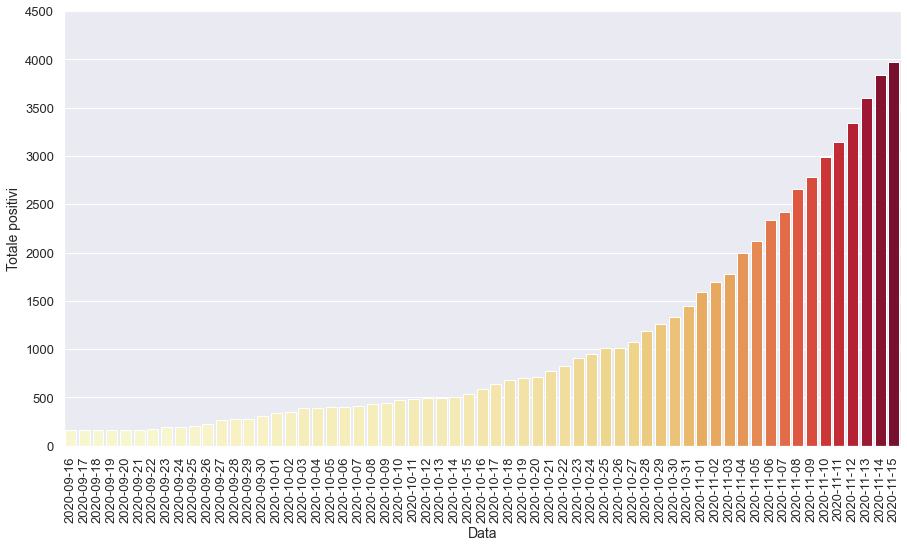

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

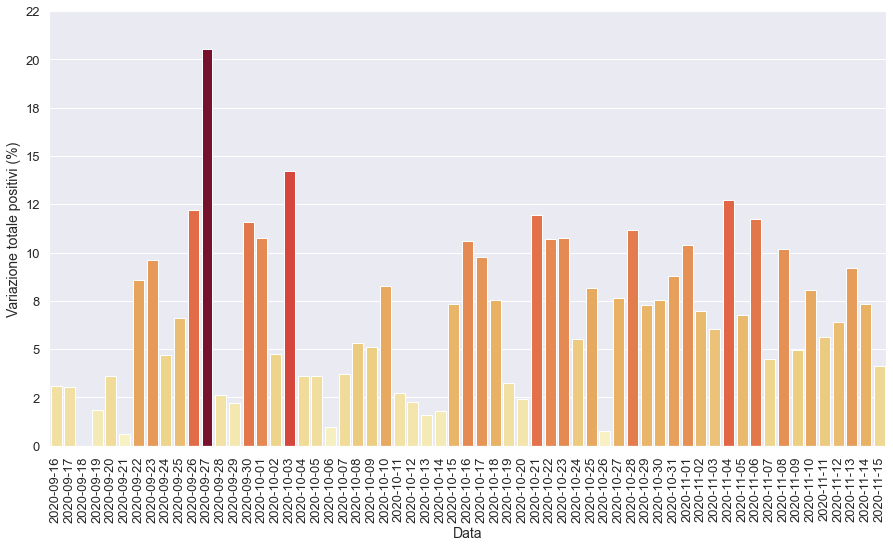

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

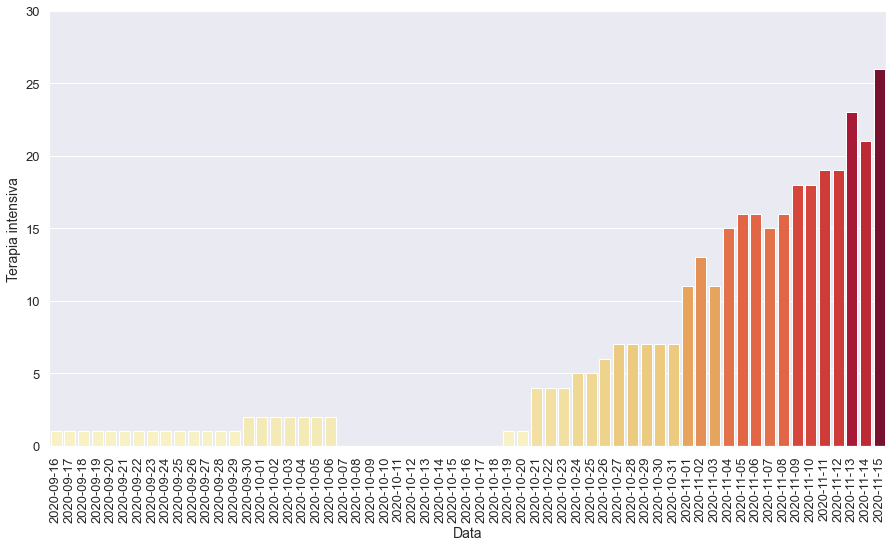

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

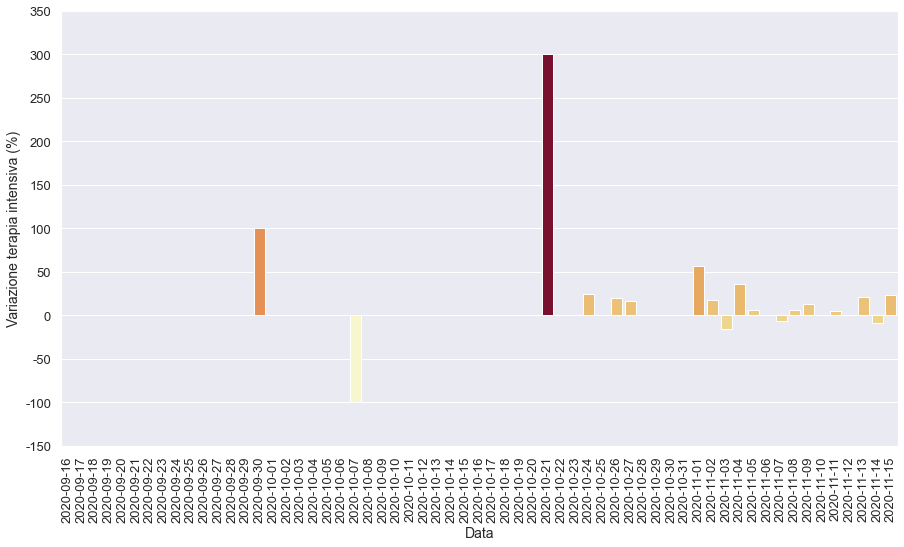

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

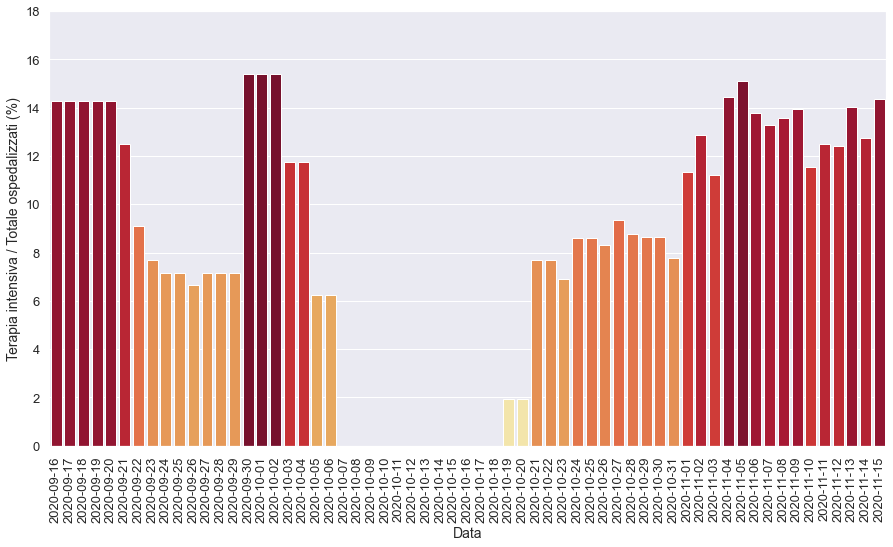

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

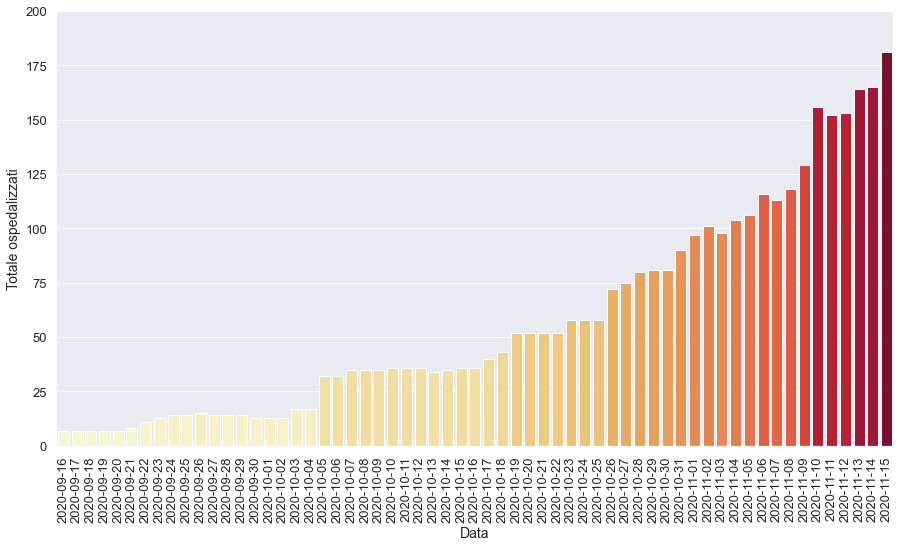

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

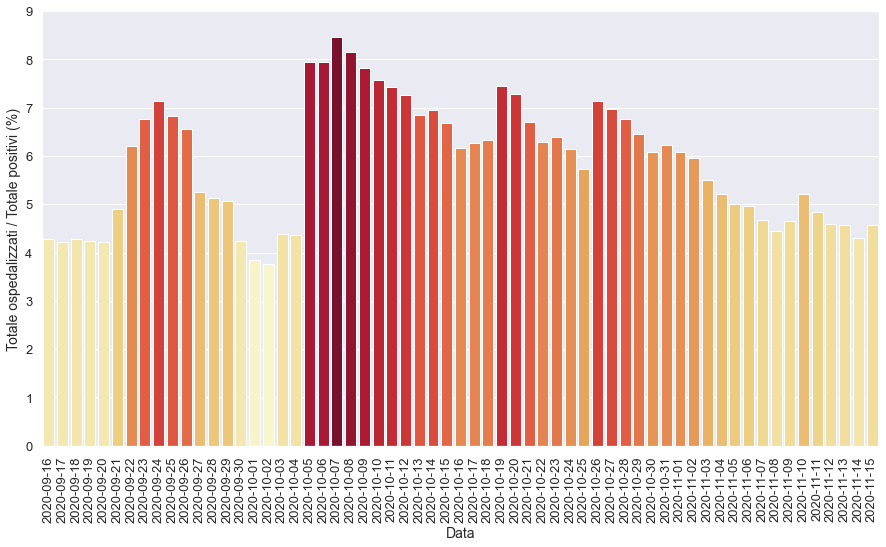

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

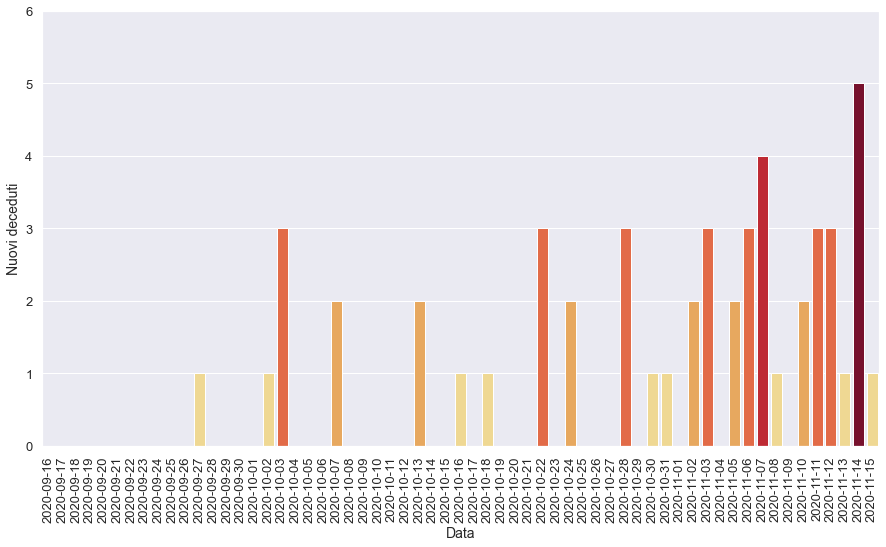

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

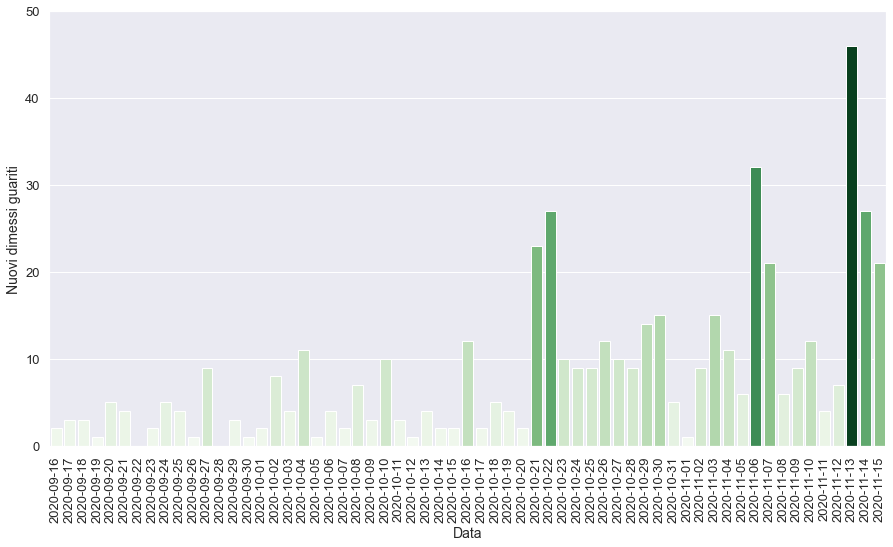

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-16T17:00:00,17,Basilicata,36,0,36,547,583,44,57,...,1.0,1116.0,1116.0,44.0,0.00,6.17,5.11,5.11,0.00,10.575
1,2020-10-17T17:00:00,17,Basilicata,40,0,40,598,638,55,57,...,0.0,1123.0,1113.0,51.0,0.00,6.27,5.08,5.12,0.00,9.777
2,2020-10-18T17:00:00,17,Basilicata,43,0,43,637,680,42,48,...,1.0,950.0,950.0,39.0,0.00,6.32,5.05,5.05,0.00,7.524
3,2020-10-19T17:00:00,17,Basilicata,51,1,52,646,698,18,22,...,0.0,397.0,407.0,9.0,1.92,7.45,5.54,5.41,0.00,3.235
4,2020-10-20T17:00:00,17,Basilicata,51,1,52,661,713,15,17,...,0.0,1115.0,1105.0,15.0,1.92,7.29,1.52,1.54,0.00,2.436
5,2020-10-21T17:00:00,17,Basilicata,48,4,52,723,775,62,85,...,0.0,1201.0,1201.0,62.0,7.69,6.71,7.08,7.08,300.00,11.921
6,2020-10-22T17:00:00,17,Basilicata,48,4,52,776,828,53,83,...,3.0,1256.0,1256.0,53.0,7.69,6.28,6.61,6.61,0.00,10.710
7,2020-10-23T17:00:00,17,Basilicata,54,4,58,849,907,79,89,...,0.0,1434.0,1434.0,73.0,6.90,6.39,6.21,6.21,0.00,10.749
8,2020-10-24T17:00:00,17,Basilicata,53,5,58,887,945,38,50,...,2.0,1214.0,1214.0,38.0,8.62,6.14,4.12,4.12,25.00,5.519
9,2020-10-25T17:00:00,17,Basilicata,53,5,58,955,1013,68,77,...,0.0,1181.0,1172.0,68.0,8.62,5.73,6.52,6.57,0.00,8.148


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

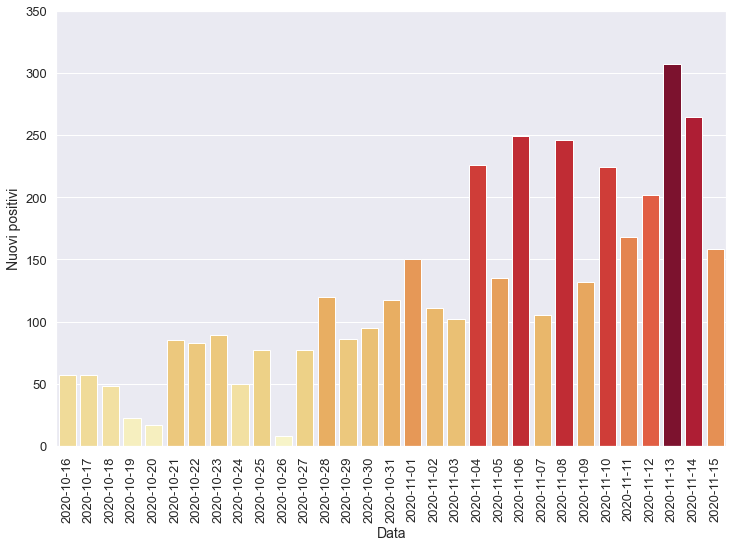

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

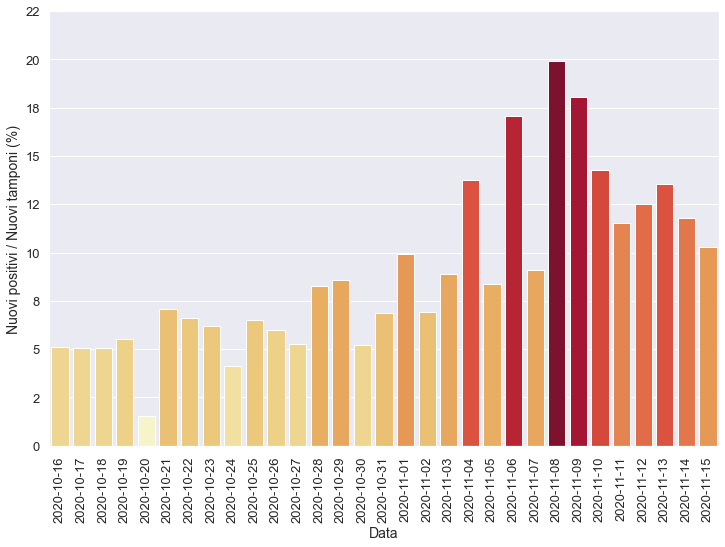

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

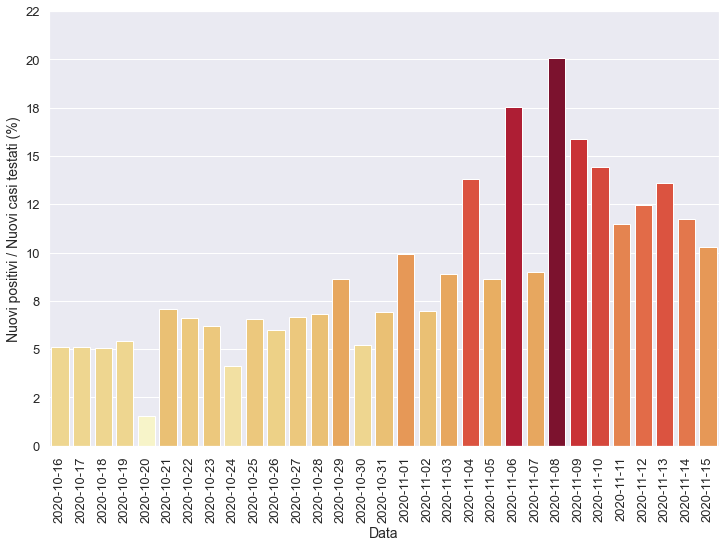

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

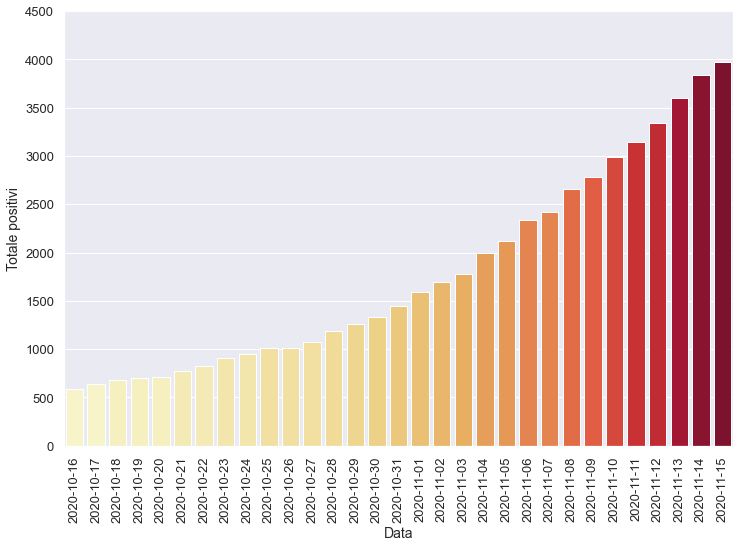

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

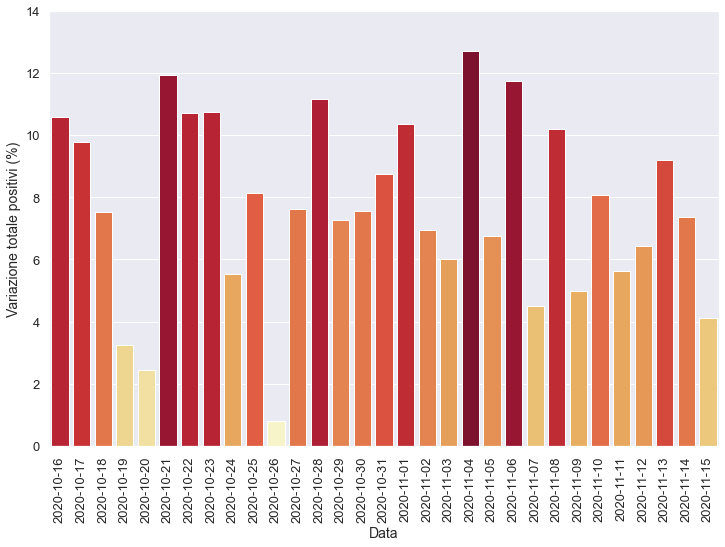

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

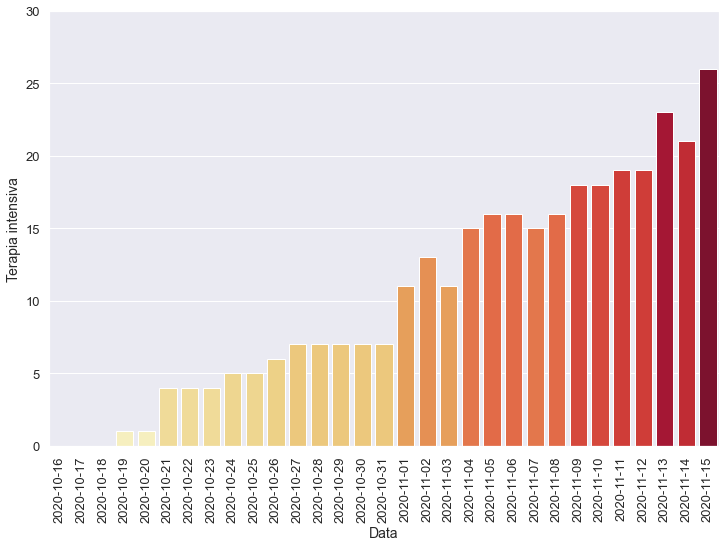

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

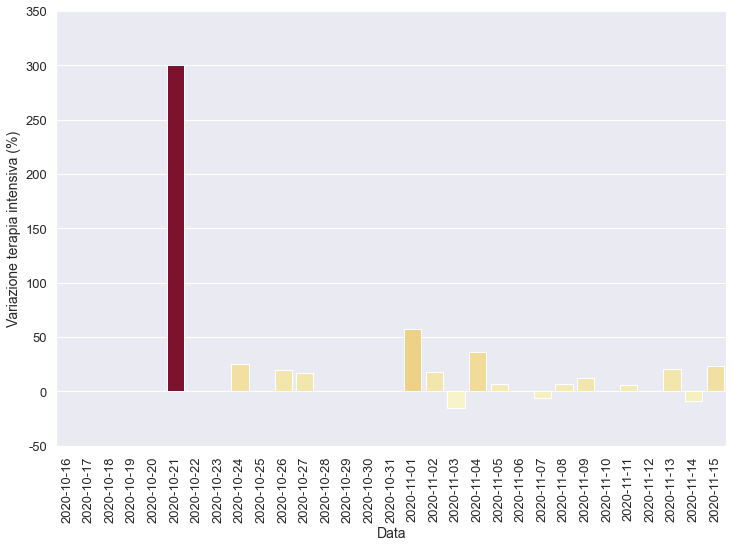

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

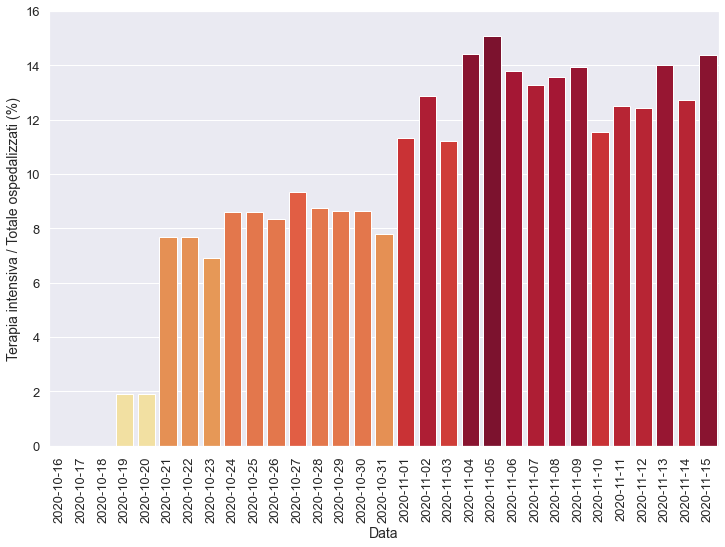

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

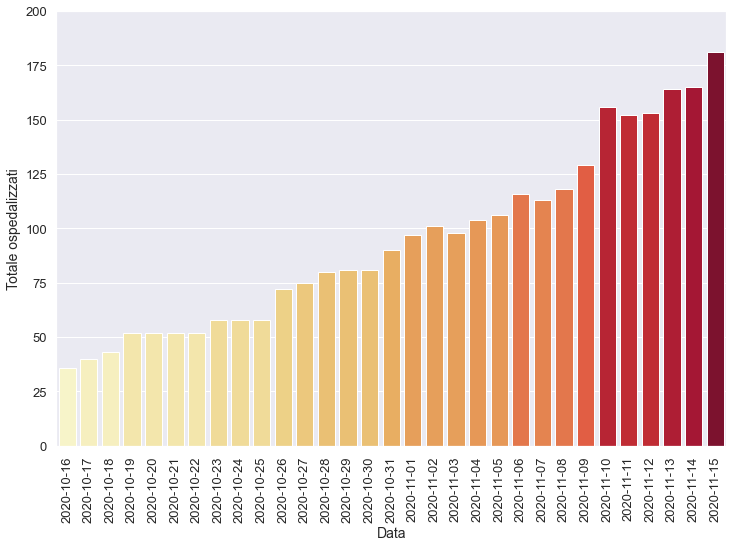

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

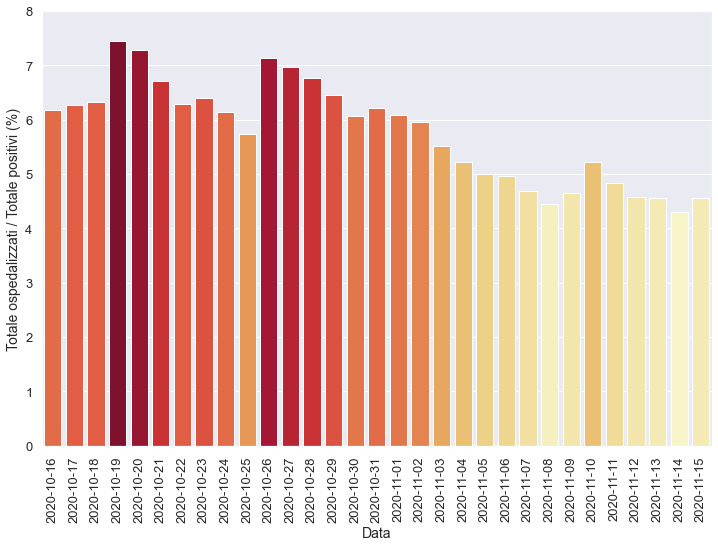

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

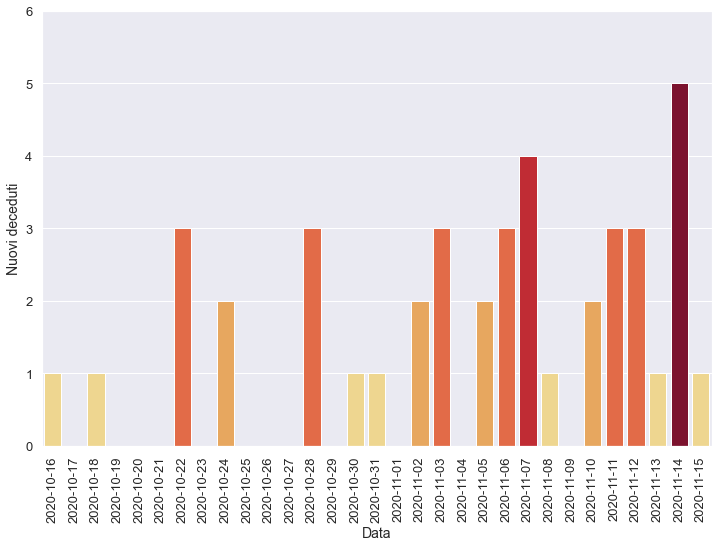

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

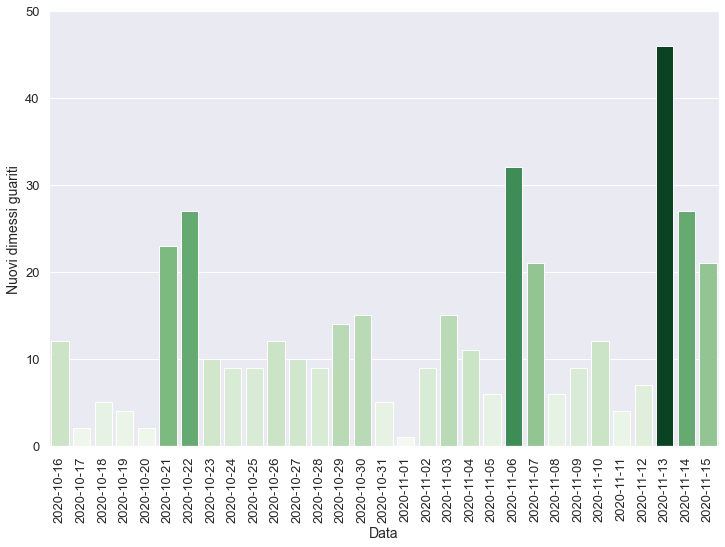

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-08T17:00:00,17,Basilicata,102,16,118,2536,2654,239,246,...,1.0,1236.0,1226.0,234.0,13.56,4.45,19.90,20.07,6.67,10.186
1,2020-11-09T17:00:00,17,Basilicata,111,18,129,2648,2777,123,132,...,0.0,731.0,831.0,112.0,13.95,4.65,18.06,15.88,12.50,4.974
2,2020-11-10T17:00:00,17,Basilicata,138,18,156,2831,2987,210,224,...,2.0,1571.0,1551.0,183.0,11.54,5.22,14.26,14.44,0.00,8.066
3,2020-11-11T17:00:00,17,Basilicata,133,19,152,2996,3148,161,168,...,3.0,1456.0,1466.0,165.0,12.50,4.83,11.54,11.46,5.56,5.624
4,2020-11-12T17:00:00,17,Basilicata,134,19,153,3187,3340,192,202,...,3.0,1615.0,1623.0,191.0,12.42,4.58,12.51,12.45,0.00,6.417
5,2020-11-13T17:00:00,17,Basilicata,141,23,164,3436,3600,260,307,...,1.0,2269.0,2256.0,249.0,14.02,4.56,13.53,13.61,21.05,9.192
6,2020-11-14T17:00:00,17,Basilicata,144,21,165,3668,3833,233,265,...,5.0,2250.0,2255.0,232.0,12.73,4.30,11.78,11.75,-8.70,7.361
7,2020-11-15T17:00:00,17,Basilicata,155,26,181,3788,3969,136,158,...,1.0,1532.0,1532.0,120.0,14.36,4.56,10.31,10.31,23.81,4.122


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

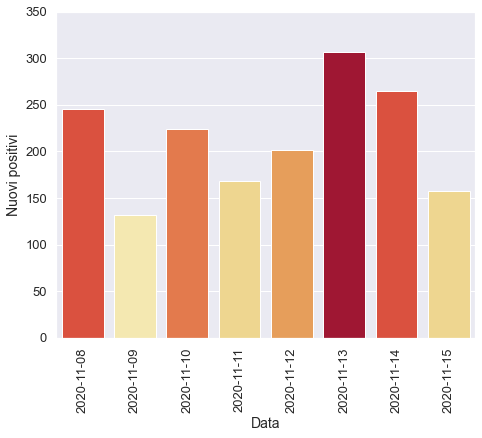

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

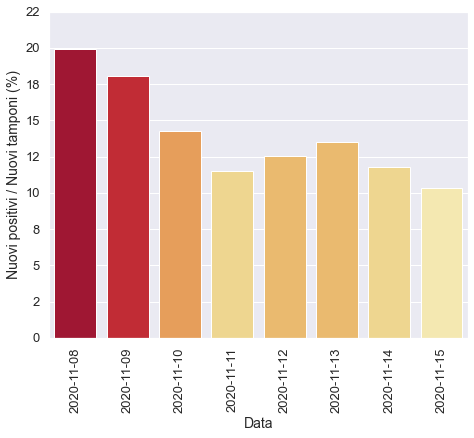

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

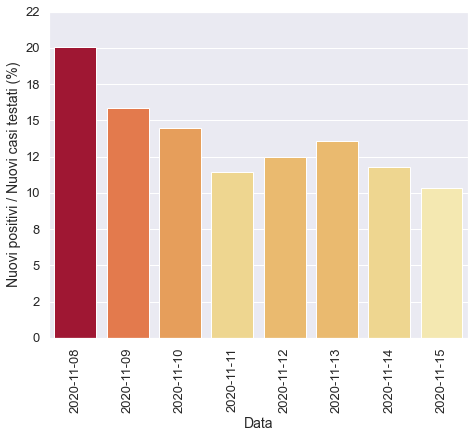

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

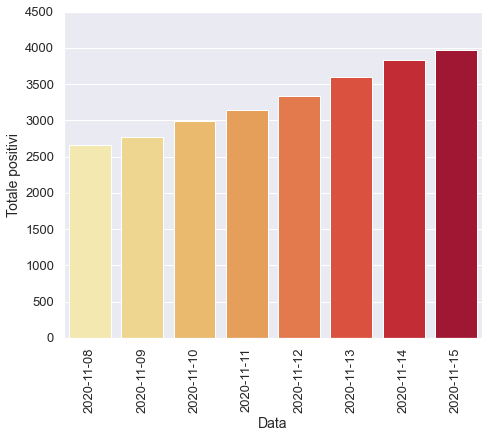

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

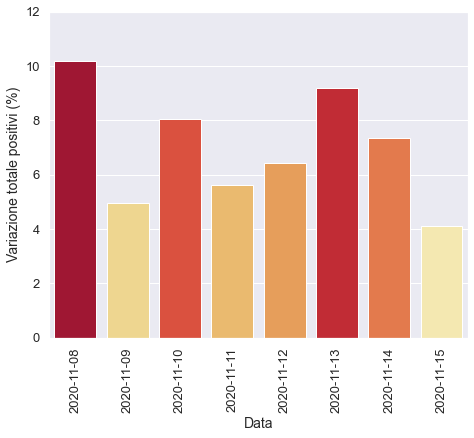

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

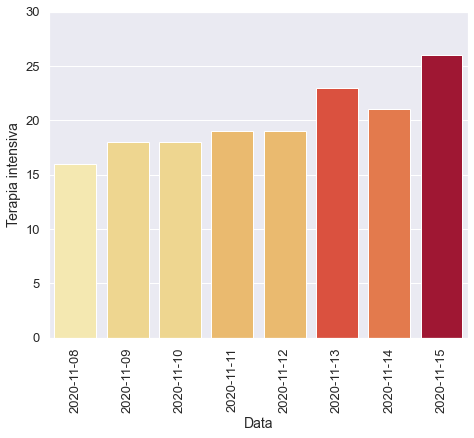

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

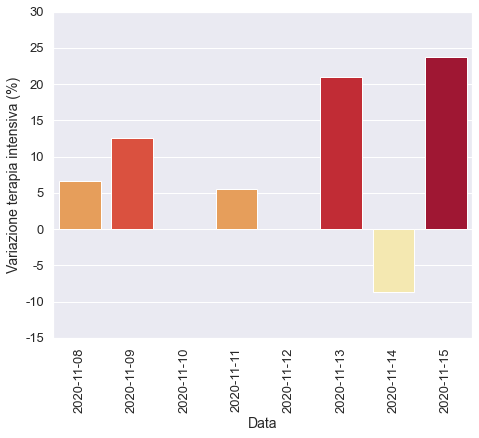

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

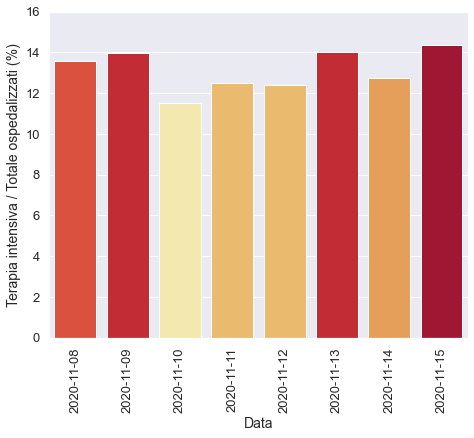

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

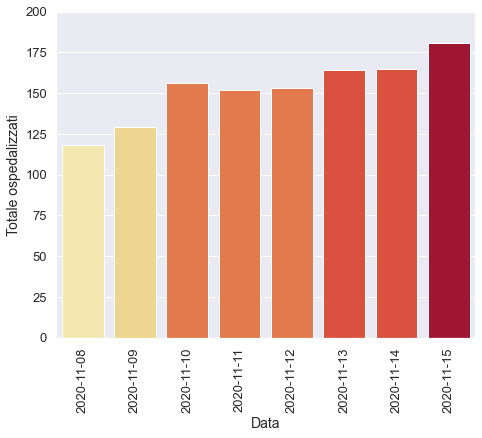

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

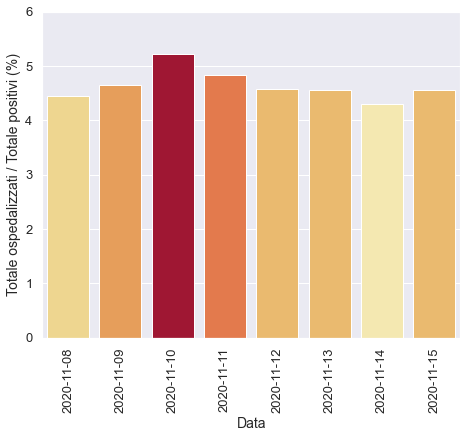

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

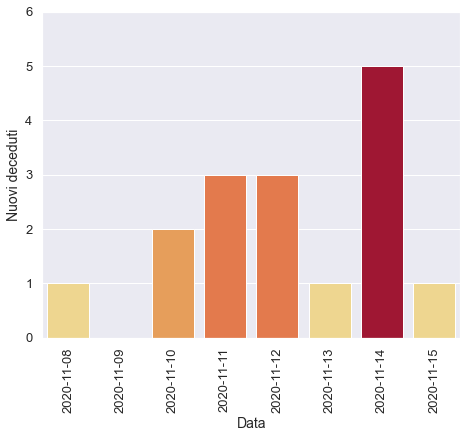

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

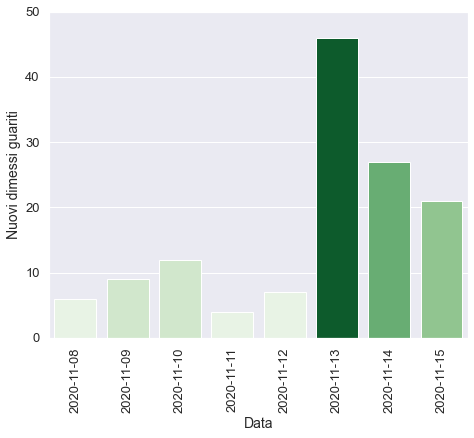

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)